In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

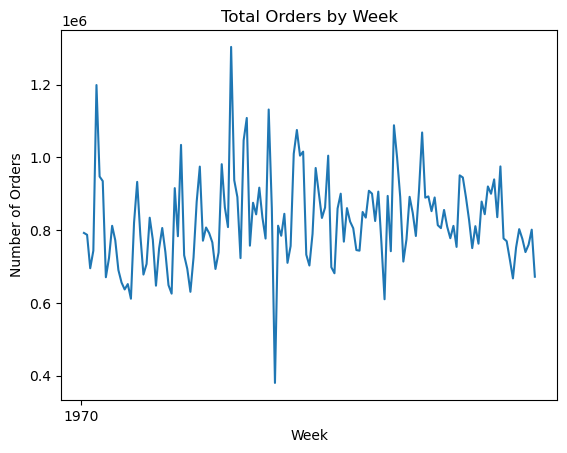

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the provided URL
url = 'https://raw.githubusercontent.com/sahaa63/demand/main/Data/data.csv'
data = pd.read_csv(url)

# Convert the week column to a datetime object
data['week'] = pd.to_datetime(data['week'], format='%Y-%m-%d')

# Group the data by week and aggregate the number of orders
orders_by_week = data.groupby('week')['num_orders'].sum()

# Create a line plot of the orders over time
plt.plot(orders_by_week.index, orders_by_week.values)

# Set the title and axis labels
plt.title('Total Orders by Week')
plt.xlabel('Week')
plt.ylabel('Number of Orders')

# Display the plot
plt.show()


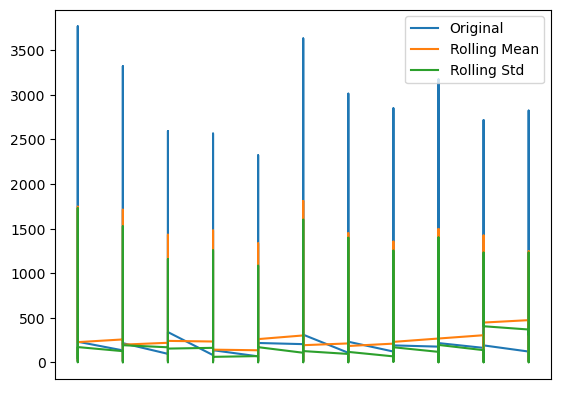

ADF Statistic: -18.96224448951897
p-value: 0.0
Critial Values:
   1%, -3.430531518984584
Critial Values:
   5%, -2.861620226977644
Critial Values:
   10%, -2.5668127022861977


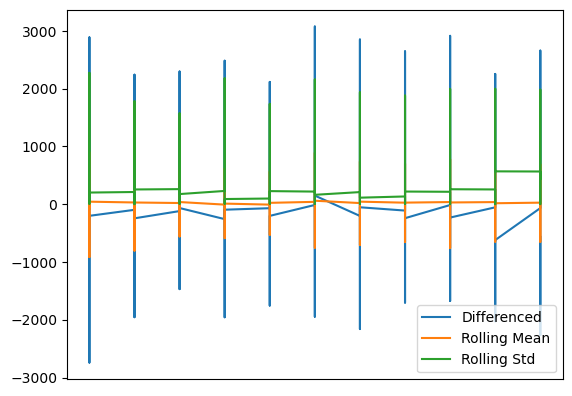

ADF Statistic: -40.01037966281215
p-value: 0.0
Critial Values:
   1%, -3.4305315240233583
Critial Values:
   5%, -2.8616202292045916
Critial Values:
   10%, -2.5668127034715438


/opt/conda/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


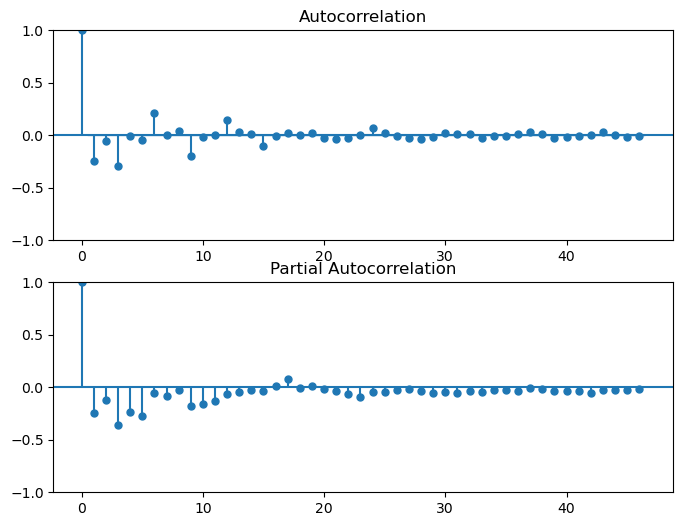

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

# Load the data
data = pd.read_csv('https://raw.githubusercontent.com/sahaa63/demand/main/Data/data.csv')

# Subset the data to weeks 135-145
subset = data.loc[(data['week'] >= 135) & (data['week'] <= 145), ['week', 'num_orders']].reset_index(drop=True)

# Convert the week column to a datetime object and set it as the index
subset['week'] = pd.to_datetime(subset['week'], format='%Y-%m-%d')
subset.set_index('week', inplace=True)

# Check for stationarity
mean = subset['num_orders'].rolling(window=4).mean()
std = subset['num_orders'].rolling(window=4).std()
plt.plot(subset['num_orders'], label='Original')
plt.plot(mean, label='Rolling Mean')
plt.plot(std, label='Rolling Std')
plt.legend()
plt.show()
result = adfuller(subset['num_orders'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# Apply differencing to make the time series stationary
subset_diff = subset.diff().dropna()

# Check for stationarity again
mean = subset_diff['num_orders'].rolling(window=4).mean()
std = subset_diff['num_orders'].rolling(window=4).std()
plt.plot(subset_diff['num_orders'], label='Differenced')
plt.plot(mean, label='Rolling Mean')
plt.plot(std, label='Rolling Std')
plt.legend()
plt.show()
result = adfuller(subset_diff['num_orders'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# Examine the autocorrelation and partial autocorrelation plots
fig, ax = plt.subplots(2, 1, figsize=(8, 6))
plot_acf(subset_diff, ax=ax[0])
plot_pacf(subset_diff, ax=ax[1])
plt.show()

# Select an appropriate ARIMA model using the AIC
aic_scores = []


In [5]:
import pandas as pd
import numpy as np
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

# Load data
data = pd.read_csv('https://raw.githubusercontent.com/sahaa63/demand/main/Data/data.csv')

# Filter data for weeks 135-145
data = data[data['week'].between(135, 145)]

# Group data by week and sum num_orders
data = data.groupby(['week'])['num_orders'].sum().reset_index()

# Split data into train and test sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Fit the model
model = ExponentialSmoothing(train['num_orders'], seasonal='add', seasonal_periods=52).fit()

# Make predictions for test set
predictions = model.predict(start=test.index[0], end=test.index[-1])

# Calculate R-squared
r2 = r2_score(test['num_orders'], predictions)

# Calculate MAPE
mape = mean_absolute_percentage_error(test['num_orders'], predictions)

# Print R-squared and MAPE
print("R-squared: ", r2)
print("MAPE: ", mape)


ValueError: Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.

In [6]:
import pandas as pd
import numpy as np
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

# Load data
data = pd.read_csv('https://raw.githubusercontent.com/sahaa63/demand/main/Data/data.csv')

# Filter data for weeks 135-145
data = data[data['week'].between(135, 145)]

# Group data by week and sum num_orders
data = data.groupby(['week'])['num_orders'].sum().reset_index()

# Increase training set size
train_size = int(len(data) * 0.9)
train, test = data[:train_size], data[train_size:]

# Fit the model
model = ExponentialSmoothing(train['num_orders'], seasonal='add', seasonal_periods=52).fit()

# Make predictions for test set
predictions = model.predict(start=test.index[0], end=test.index[-1])

# Calculate R-squared
r2 = r2_score(test['num_orders'], predictions)

# Calculate MAPE
mape = mean_absolute_percentage_error(test['num_orders'], predictions)

# Print R-squared and MAPE
print("R-squared: ", r2)
print("MAPE: ", mape)


ValueError: Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.

In [7]:
import pandas as pd
from statsmodels.tsa.statespace.varmax import VARMAX
from sklearn.metrics import r2_score, mean_absolute_percentage_error

# Load data and filter for weeks 135-145
data = pd.read_csv("https://raw.githubusercontent.com/sahaa63/demand/main/Data/data.csv")
data = data[data["week"].isin(range(135, 146))]

# Create a VARMAX model
model = VARMAX(data["num_orders"], order=(2, 1), trend="c", exog=data[["emailer_for_promotion", "homepage_featured"]])

# Fit the model
results = model.fit(maxiter=1000, disp=False)

# Make predictions
pred = results.predict(start="2019-06-24", end="2019-09-22", exog=data[["emailer_for_promotion", "homepage_featured"]])

# Calculate R-squared and MAPE
r2 = r2_score(data["num_orders"], pred)
mape = mean_absolute_percentage_error(data["num_orders"], pred)

print("R-squared:", r2)
print("MAPE:", mape)


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)


IndexError: tuple index out of range

In [13]:
import pandas as pd
from statsmodels.tsa.statespace.varmax import VARMAX
from sklearn.metrics import r2_score, mean_absolute_percentage_error

# Load data and filter for weeks 135-145
data = pd.read_csv("https://raw.githubusercontent.com/sahaa63/demand/main/Data/data.csv")
data["week"] = pd.to_datetime(data["week"])
data = data.set_index("week")
data = data.loc["2019-08-26":"2019-11-24"]

# Create a VARMAX model
model = VARMAX(data["num_orders"], order=(2,0), trend="c", exog=data[["emailer_for_promotion", "homepage_featured"]])

# Fit the model
results = model.fit(maxiter=1000, disp=False)

# Make predictions
pred = results.predict(start="2019-11-25", end="2019-12-22", exog=data[["emailer_for_promotion", "homepage_featured"]])

# Calculate R-squared and MAPE
r2 = r2_score(data["num_orders"].loc["2019-11-25":"2019-12-22"], pred)
mape = mean_absolute_percentage_error(data["num_orders"].loc["2019-11-25":"2019-12-22"], pred)

print("R-squared:", r2)
print("MAPE:", mape)



IndexError: tuple index out of range

In [14]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score, mean_absolute_percentage_error

# Load data and filter for weeks 135-145
data = pd.read_csv("https://raw.githubusercontent.com/sahaa63/demand/main/Data/data.csv")
data = data[data["week"].isin(range(135, 146))]

# Create an ARIMA model
model = ARIMA(data["num_orders"], order=(1, 0, 1))

# Fit the model
results = model.fit()

# Make predictions
pred = results.predict(start="2019-06-24", end="2019-09-22")

# Calculate R-squared and MAPE
r2 = r2_score(data["num_orders"], pred)
mape = mean_absolute_percentage_error(data["num_orders"], pred)

print("R-squared:", r2)
print("MAPE:", mape)



/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [15]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score, mean_absolute_percentage_error

# Load data and filter for weeks 135-145
data = pd.read_csv("https://raw.githubusercontent.com/sahaa63/demand/main/Data/data.csv")
data = data[data["week"].isin(range(135, 146))]

# Create an ARIMA model
model = ARIMA(data["num_orders"], order=(3, 1, 2))

# Fit the model
results = model.fit()

# Make predictions
pred = results.predict(start=0, end=len(data)-1)

# Calculate R-squared and MAPE
r2 = r2_score(data["num_orders"], pred)
mape = mean_absolute_percentage_error(data["num_orders"], pred)

print("R-squared:", r2)
print("MAPE:", mape)


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


R-squared: 0.227755144633785
MAPE: 2.053308250711992


In [21]:
import pandas as pd
from statsmodels.tsa.statespace.varmax import VARMAX
from sklearn.metrics import r2_score, mean_absolute_percentage_error

# Load data and filter for weeks 135-145
data = pd.read_csv("https://raw.githubusercontent.com/sahaa63/demand/main/Data/data.csv")
data = data[data["week"].isin(range(135, 146))]
data = data.set_index("week")

# Create a VARMAX model
model = VARMAX(data["num_orders"], order=(2,0,2), trend="c", exog=data[["emailer_for_promotion", "homepage_featured"]])

# Fit the model
results = model.fit(maxiter=1000, disp=False)

# Make predictions
pred = results.predict(start=135, end=145, exog=data[["emailer_for_promotion", "homepage_featured"]])

# Calculate R-squared and MAPE
r2 = r2_score(data["num_orders"], pred)
mape = mean_absolute_percentage_error(data["num_orders"], pred)

print("R-squared:", r2)
print("MAPE:", mape)


IndexError: tuple index out of range

In [20]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import r2_score, mean_absolute_percentage_error

# Load data and filter for weeks 135-145
data = pd.read_csv("https://raw.githubusercontent.com/sahaa63/demand/main/Data/data.csv")
data = data[data["week"].isin(range(135, 146))]

# Create a SARIMAX model
model = SARIMAX(data["num_orders"], order=(2, 1, 2), seasonal_order=(1, 1, 1, 12))

# Fit the model
results = model.fit()

# Make predictions
pred = results.predict(start=0, end=len(data)-1)

# Calculate R-squared and MAPE
r2 = r2_score(data["num_orders"], pred)
mape = mean_absolute_percentage_error(data["num_orders"], pred)

print("R-squared:", r2)
print("MAPE:", mape)


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.37925D+00    |proj g|=  5.51228D-01


 This problem is unconstrained.



At iterate    5    f=  7.02579D+00    |proj g|=  2.54726D-02

At iterate   10    f=  7.00151D+00    |proj g|=  7.28029D-03

At iterate   15    f=  6.99641D+00    |proj g|=  1.56029D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     18     37      1     0     0   1.749D-02   6.990D+00
  F =   6.9900717177128628     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


R-squared: 0.20340770221506788
MAPE: 2.1864550981555695
